<a href="https://colab.research.google.com/github/arianajschindler/microteaching_stats/blob/main/Statistics_Micro_Teaching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microteaching: Statistics for Data Science

Save a copy of this colab to your drive!

### Main Learning Outcome

*   Given a template in Google Colab, students will interact with a provided dataset to gain exposure to real application of model selection.

# Part 1: Statistical Packages for Python

### Learning Outcomes


*   Students will import useful statistical packages to use for EDA and model selection. 



There are a lot of really useful Statistical packages we can use in Python: 

*   **Pandas:** Data manipulation and analysis with Tables
https://pandas.pydata.org/docs/

*   **Numpy:** Built-in functions for numerical routines, operations on arrays.
https://numpy.org/doc/

*   **Statsmodels:** Exploring data, estimating statistical models, performing statistical tests.
https://www.statsmodels.org/stable/index.html

*   **SciPy:** Advanced functionality of Numpy
https://scipy-lectures.org/

*   **Matplotlib:** Plotting and Visualization library for Numpy
https://matplotlib.org/stable/gallery/index.html#event-handling

*   **Researchpy:** Produces dataframes containing relevant statistical testing information
https://researchpy.readthedocs.io/en/latest/


Even though we won't utilize all of these packages in this lesson, let's take a minute to import them!

In [ ]:
# importing statistical packages above
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
!pip install researchpy

# Part 2: Exploring Data and Model Selection

### Learning Outcomes

*   Students will review the structural data requirements of normally distributed data in order to perform accurate analysis.

*   Students will differentiate between different types of data, perform descriptive statistics, and select the appropriate models to produce meaningful results.

## Getting the Data

To begin our lesson, we need data to work with. We will import Pandas and our data. Press run which will prompt you to enter a code. Open the link and sign in to retrieve the code.

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
# type your file path here
taylor = pd.read_csv('/gdrive/MyDrive/taylor_data.csv')
taylor.head()

,Song,Album,Year,Track Number,Song Length,Word Count,Genre,Single,Label
0,Tim McGraw,Taylor Swift,2006,1,234,368,Country,Yes,Big Machine
1,Picture to Burn,Taylor Swift,2006,2,175,291,Country,Yes,Big Machine
2,Teardrops on My Guitar,Taylor Swift,2006,3,215,288,Country,Yes,Big Machine
3,A Place in This World,Taylor Swift,2006,4,202,233,Country,No,Big Machine
4,Cold as You,Taylor Swift,2006,5,241,245,Country,No,Big Machine


For the sake of time, this dataset needs minimal cleaning and has no null values. We do, however, want to check the variable types and change them if needed. This will help in deciding what questions we want to ask and which statistical tests to run.

In [ ]:
# checking the variables in our data and their types
# it is helpful to note that Song Length is the duration of the song in seconds
taylor.dtypes

Song            object
Album           object
Year             int64
Track Number     int64
Song Length      int64
Word Count       int64
Genre           object
Single          object
Label           object
dtype: object

In [ ]:
# this block is just changing the Year and Track Number variables to categorical variables
taylor['Year'] = taylor['Year'].astype(object)
taylor['Track Number'] = taylor['Track Number'].astype(object)

In [ ]:
# renaming variables to remove the space
taylor['Word_Count'] = taylor['Word Count']
taylor['Song_Length'] = taylor['Song Length']
taylor['Track_Number'] = taylor['Track Number']
taylor = taylor.drop(columns = ['Word Count', 'Song Length', 'Track Number'])

## Descriptive Statistics

*   Frequencies: Use with Categorical data

*   Basic Measurements: Use with Continuous data



Now that our data set is clean, we can see the different types of variables in our dataset: 

*   Song: **Categorical**

*   Album: **Categorical**

*   Year: **Categorical**

*   Track Number: **Categorical**

*   Song Length: **Continuous**

*   Word Count: **Continuous**

*   Genre: **Categorical**

*   Single: **Bivariate** (has two options: yes and no)

*   Label: **Categorical** 


Let's check how many observations are in our data. We need >30 observations for our data to be normally distributed. Then we will explore our data with descriptive statistics. In **Pandas**, we can use .describe() to return standard statistics for our data.

In [ ]:
# checking how many observations are in our dataframe
len(taylor.index)

131

Now that we have confirmed our dataset has >30 observations, we can perform descriptive statistics on our continuous variables!

In [ ]:
# using .describe() to get quick statistics
# can also use df['variable'].describe() to get standard statistics on a single variable
taylor.describe()

,Word_Count,Song_Length
count,131.000000,131.000000
mean,366.083969,236.206107
std,93.477931,40.171884
min,153.000000,150.000000
25%,301.000000,209.500000
50%,368.000000,232.000000
75%,418.500000,251.500000
max,718.000000,403.000000


We can also create groups and aggregate to return a table of a specific statistic. Say we want to know the average length and average word count of songs on each album. The code below will group all of the songs by album and then return the mean statistic for the remaining variables.

Extra: Try grouping by another categorical variable(i.e. Year) and check a different statistic!

In [ ]:
# code to group by "Album" and return the mean for each group for all columns
taylor.groupby(["Album"]).agg("mean")

,Word_Count,Song_Length
Album,,
1989,449.153846,224.692308
Evermore,347.000000,242.533333
Fearless,344.692308,246.615385
Folklore,301.687500,238.062500
Lover,367.000000,206.000000
Red,330.500000,244.312500
Reputation,463.400000,222.533333
Speak Now,395.285714,286.857143
Taylor Swift,293.272727,218.000000


There are a lot of visualizations we can use to get to know our data better but let's check out a boxplot to check for outliers in song length.

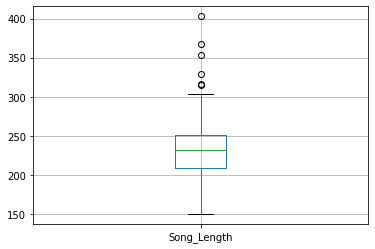

In [ ]:
# creating a boxplot for Song Length to visibly check for outliers
taylor.boxplot(column='Song_Length')

## Inferential Statistics
*   Hypothesis testing

*   Correlation

*   Confidence Intervals

*   Significance Tests

*   Prediction

#### Linear Regression: Song Length and Word Count

A question we might want to ask is if Song Length is a good predictor of Word Count. In our question, we have two continuous variables: Song Length is the independent variable and Word Count is the dependent variable. Our Null Hypothesis is that there is no relationship and our Alternative Hypothesis is that there is.

Continuous variables are preferred for linear regression, but it is always helpful to look at a scatterplot of two variables to decide which model might work best to discern the relationship.

We can first check out a scatterplot to visualize the correlation using **Matplotlib**.

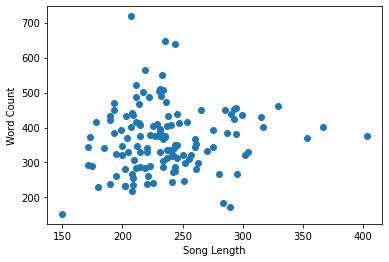

In [ ]:
# create a scatterplot for two continuous variables
import matplotlib.pyplot as plt
plt.scatter(x=taylor['Song_Length'], y=taylor['Word_Count'])
plt.xlabel("Song Length")
plt.ylabel('Word Count')
plt.show()

There are three things we need to interpret from this scatterplot: 
*   **Magnitude:** Weak, Moderate, or Strong?

*  **Linearity** Linear, Non-linear, or No relationship?

*   **Direction:** Positive, Negative, or No slope?

As long as no non-linear relationship is detected, we can perform a correlation.

In [ ]:
# correlate the continuous variables for 'Song Length' and 'Word Count'
from scipy import stats
x = taylor['Song_Length']
y = taylor['Word_Count']
stats.pearsonr(x,y)

(0.0839797545972001, 0.3402527428430016)

The first value output is our Correlation Coefficient. This numbeer ranges from -1 to +1, with no correlation as the number tends to zero. The second value is the p-value. Our correlation coefficient is very close to zero so we can say that any relationship between these two variables is positive and very weak. **Let's check this with a linear regression.**

For linear regressions, we are constructing a model to see if song length has an effect on word count of a song. Therefore, word count is our outcome variable (y) and song length is our predictor variable (x). 

The a linear model follows a simple slope intercept form: 

y = mx + b 

OR in statistical notation 

y = βx + α 


*   y: word count 
*  β: effect of song length on word count (correlation coefficient)

* x: song length 
*  α: intercept (the word count when the song length is zero) 


(array([ 3., 19., 26., 36., 27., 10.,  6.,  1.,  2.,  1.]),
 array([-202.40077353, -146.39835726,  -90.39594099,  -34.39352472,
          21.60889155,   77.61130782,  133.61372409,  189.61614036,
         245.61855663,  301.62097291,  357.62338918]),
 <a list of 10 Patch objects>)

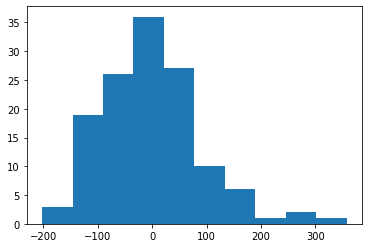

In [ ]:
# add the constant to the x variable you previously defined
X = sm.add_constant(x)
Y = y

# define the content of the model
mod = sm.OLS(Y,X)

# store the results of your fitted model
res = mod.fit()

#create a histogram of the residuals to confirm assumption of normality
plt.hist(res.resid)

In [ ]:
# summary elements of the res variable
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Word_Count   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9162
Date:                Tue, 16 Nov 2021   Prob (F-statistic):              0.340
Time:                        17:31:38   Log-Likelihood:                -779.36
No. Observations:                 131   AIC:                             1563.
Df Residuals:                     129   BIC:                             1568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         319.9254     48.909      6.541      

The R-squared value measures the proportion of variance in the dependent variable that can be explained by the independent variable. Our R-squared value for this regression is 0.007.

As we saw in our correlation analysis above, our linear regression confirms that song length does not have a significant effect on word count given that the p-value is 0.340. If this value was less than 0.05 and we rejected our null hypothesis then our OLS regression would tell us that for every one second increase in song length there is 0.195 increase in words of a song. 

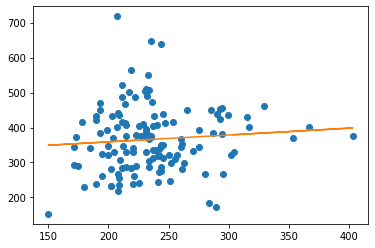

In [ ]:
#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)


As we saw from our p-value, we can also see visually that this model is not a good fit for our data. 

#### Logistic Regression: Single and Word Count

Now, if we were to look at the effect that Word Count has on whether or not the song was first released as a single, we might need a different model. Let's look at what the data looks like! 







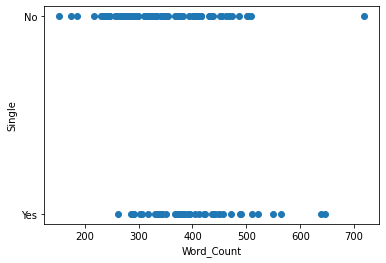

In [ ]:
plt.scatter(x=taylor['Word_Count'], y=taylor['Single'])
plt.xlabel("Word_Count")
plt.ylabel('Single')
plt.show()

Clearly, this is not is not a linear relationship. Let's try a different kind of model! Logistic regressions are best used for binary response variables because of the shape of the line using **statsmodels**.

Before we fit the model, we need to clean the data! We can't run a regression based off of "yes" and "no," so we need to create a new column of dummy variables where "yes" is 1 and "no" is 0. 

In [ ]:
#a function that creates a binary dummy variable based on the yes and no 
def clean(row):
    if row['Single'] == "Yes":
        val = 1
    elif row['Single'] == "No":
        val = 0
    else:
        val = -1
    return val

#adds a new row 
taylor["Single_Binary"] = taylor.apply(clean, axis=1)


Now we can use statsmodels to input our variables and fit the model.

In [ ]:
#import the statsmodels.formula.api library and save it as smf
import statsmodels.formula.api as smf

In [ ]:
# run the model (`Single_binary` = `Word_Count')
model_1 = smf.logit(formula='Single_Binary ~ Word_Count', data=taylor)
res_1 = model_1.fit()

Optimization terminated successfully.
         Current function value: 0.607092
         Iterations 5


In [ ]:
#return the .summary information
print(res_1.summary())

                           Logit Regression Results                           
Dep. Variable:          Single_Binary   No. Observations:                  131
Model:                          Logit   Df Residuals:                      129
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Nov 2021   Pseudo R-squ.:                 0.06335
Time:                        17:31:38   Log-Likelihood:                -79.529
converged:                       True   LL-Null:                       -84.908
Covariance Type:            nonrobust   LLR p-value:                  0.001038
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1478      0.860     -3.662      0.000      -4.832      -1.463
Word_Count     0.0068      0.002      3.059      0.002       0.002       0.011


Based on the results, we can see that the word count does have a significant effect on whether or not the song is a single. If you find the odds ratio from the coefficient, that with every one word increase in the word count the 0.68% more likely to be a single. 

Running the logistic regression again but this time looking at if Word Count with Track Number has an affect on whether a song is first released as a single.

#### Logistic Regression: Single and Track Number with Word Count

This model demonstrates that you can multiple predictors for your logistic regression. These predictors can be various types of variables including categorical and continious as demonstrated in this model. 

In [ ]:
# Crosstab of comparing track numbers and if they were chosen as singles. this is out of 9 albums
pd.crosstab(taylor['Single_Binary'], taylor['Track_Number'])

Track_Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Single_Binary,,,,,,,,,,,,,,,,,,
0,3,2,4,5,7,3,8,7,5,8,8,8,8,3,3,1,1,1
1,6,7,5,4,2,6,1,2,4,1,1,0,0,3,2,2,0,0


To get a meaningful result from our logistic regression, we need to make sure that all of our albums have the same number of tracks. We will need to cut our original dataframe down to include 11 tracks for each album.

In [ ]:
# creating new dataframe for only tracks 1-11 for each album
taylor_new = taylor[taylor['Track_Number'] == 1]
taylor_new = taylor_new.append(taylor[taylor['Track_Number'] == 2])
taylor_new = taylor_new.append(taylor[taylor['Track_Number'] == 3])
taylor_new = taylor_new.append(taylor[taylor['Track_Number'] == 4])
taylor_new = taylor_new.append(taylor[taylor['Track_Number'] == 5])
taylor_new = taylor_new.append(taylor[taylor['Track_Number'] == 6])
taylor_new = taylor_new.append(taylor[taylor['Track_Number'] == 7])
taylor_new = taylor_new.append(taylor[taylor['Track_Number'] == 8])
taylor_new = taylor_new.append(taylor[taylor['Track_Number'] == 9])
taylor_new = taylor_new.append(taylor[taylor['Track_Number'] == 10])
taylor_new = taylor_new.append(taylor[taylor['Track_Number'] == 11])

In [ ]:
# run the model (`Single_binary` = `Word_Count + C(Track_Number'))
model_2 = smf.logit(formula='Single_Binary ~ Word_Count + C(Track_Number)', data=taylor_new)
res_2 = model_2.fit()

Optimization terminated successfully.
         Current function value: 0.492934
         Iterations 7


In [ ]:
#return the .summary information
print(res_2.summary()) 

                           Logit Regression Results                           
Dep. Variable:          Single_Binary   No. Observations:                   99
Model:                          Logit   Df Residuals:                       87
Method:                           MLE   Df Model:                           11
Date:                Tue, 16 Nov 2021   Pseudo R-squ.:                  0.2648
Time:                        17:31:38   Log-Likelihood:                -48.800
converged:                       True   LL-Null:                       -66.377
Covariance Type:            nonrobust   LLR p-value:                 0.0002338
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.4864      1.332     -1.867      0.062      -5.097       0.124
C(Track_Number)[T.2]      0.4059      1.107      0.367      0.714      -1.764       2.576
C(Track_

From this model, we can see that being track 5, 7, 10, and 11 all have a significant effect on whether or not the song was released as a single. 

Odds ratio = 100 * e^b

If you find the odds ratio for each of these, you will find that... 


* Track 5 decreases the likelihood of the track being a single by 90% 
* Track 7 decreases the likelihood of the track being a single by 98% 
* Track 10 decreases the likelihood of the track being a single by 97%
* Track 11 decreases the likelihood of the track being a single by 95%





### Next Steps: 

Given these interpretations of the models, the next step in your statistical analysis would be assess the fit of the model. This can be done a number of ways including R-squared values, chi-squared values, AIC and BIC scores, and likelihood ratio test. 

### In Conclusion: 

There are so many different ways to construct different types of models. A great rule of thumb when it comes to constructing models is to first look at the data and see how it's represented. For example, binary response data creates a unit clustering that yeilds itself well to logistic regressions. Constructing models is all about knowing that the numbers are more than just numbers.


**Steps to take before choosing a model:**

*   Look at your data and identify variable types

*   Perform descriptive statistics to check numerical representations

*   Visualize your data using plots/figures

*   Using the info from the steps above, try out a model!

In this demonstration, we performed **linear regression** on two categorical variables and **logistic regression** with bivariate, continuous, and categorical data.